# House Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning & preprocessing
- Model building and evaluation
- Subjective Questions Implementation



# 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.


In [1]:
# Importing Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
Houses = pd.read_csv("train.csv")

In [3]:
# Summary of the dataset : 1460 rows and 81 columns
Houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# House dataset Head
Houses.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
# Checking numerical columns
num_cols = Houses.select_dtypes(include=['float64','int64']).columns
print("No. of Numerical Columns: ", len(num_cols))
Houses[num_cols].head()

No. of Numerical Columns:  38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

<Axes: xlabel='SalePrice', ylabel='Density'>

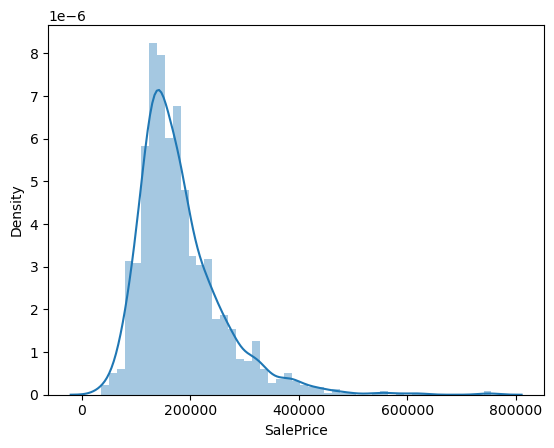

In [6]:
sns.distplot(Houses['SalePrice'])

Since the SalePrice data is skewed towards left, we will have to apply the log transformation to obtain a centralized data

In [7]:
#Log Transformation
Houses['SalePrice']=np.log1p(Houses['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

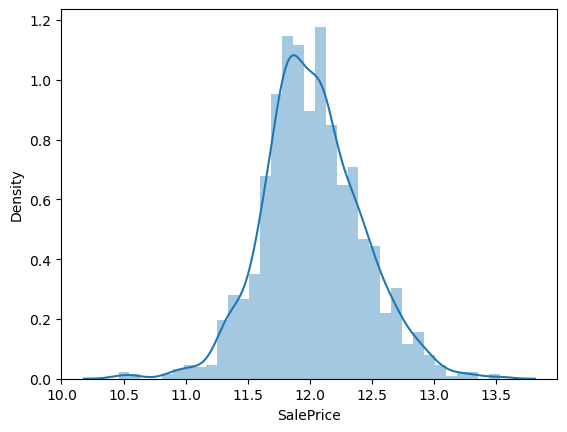

In [8]:
sns.distplot(Houses['SalePrice'])

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*.
Let's check this by plotting correlations between variables & also using a heatmap

In [9]:
# Correlation Matrix
num_cols_corr_matrix = Houses[num_cols].corr()
num_cols_corr_matrix

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.017942   -0.073959     0.355879  0.257320     0.817185   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

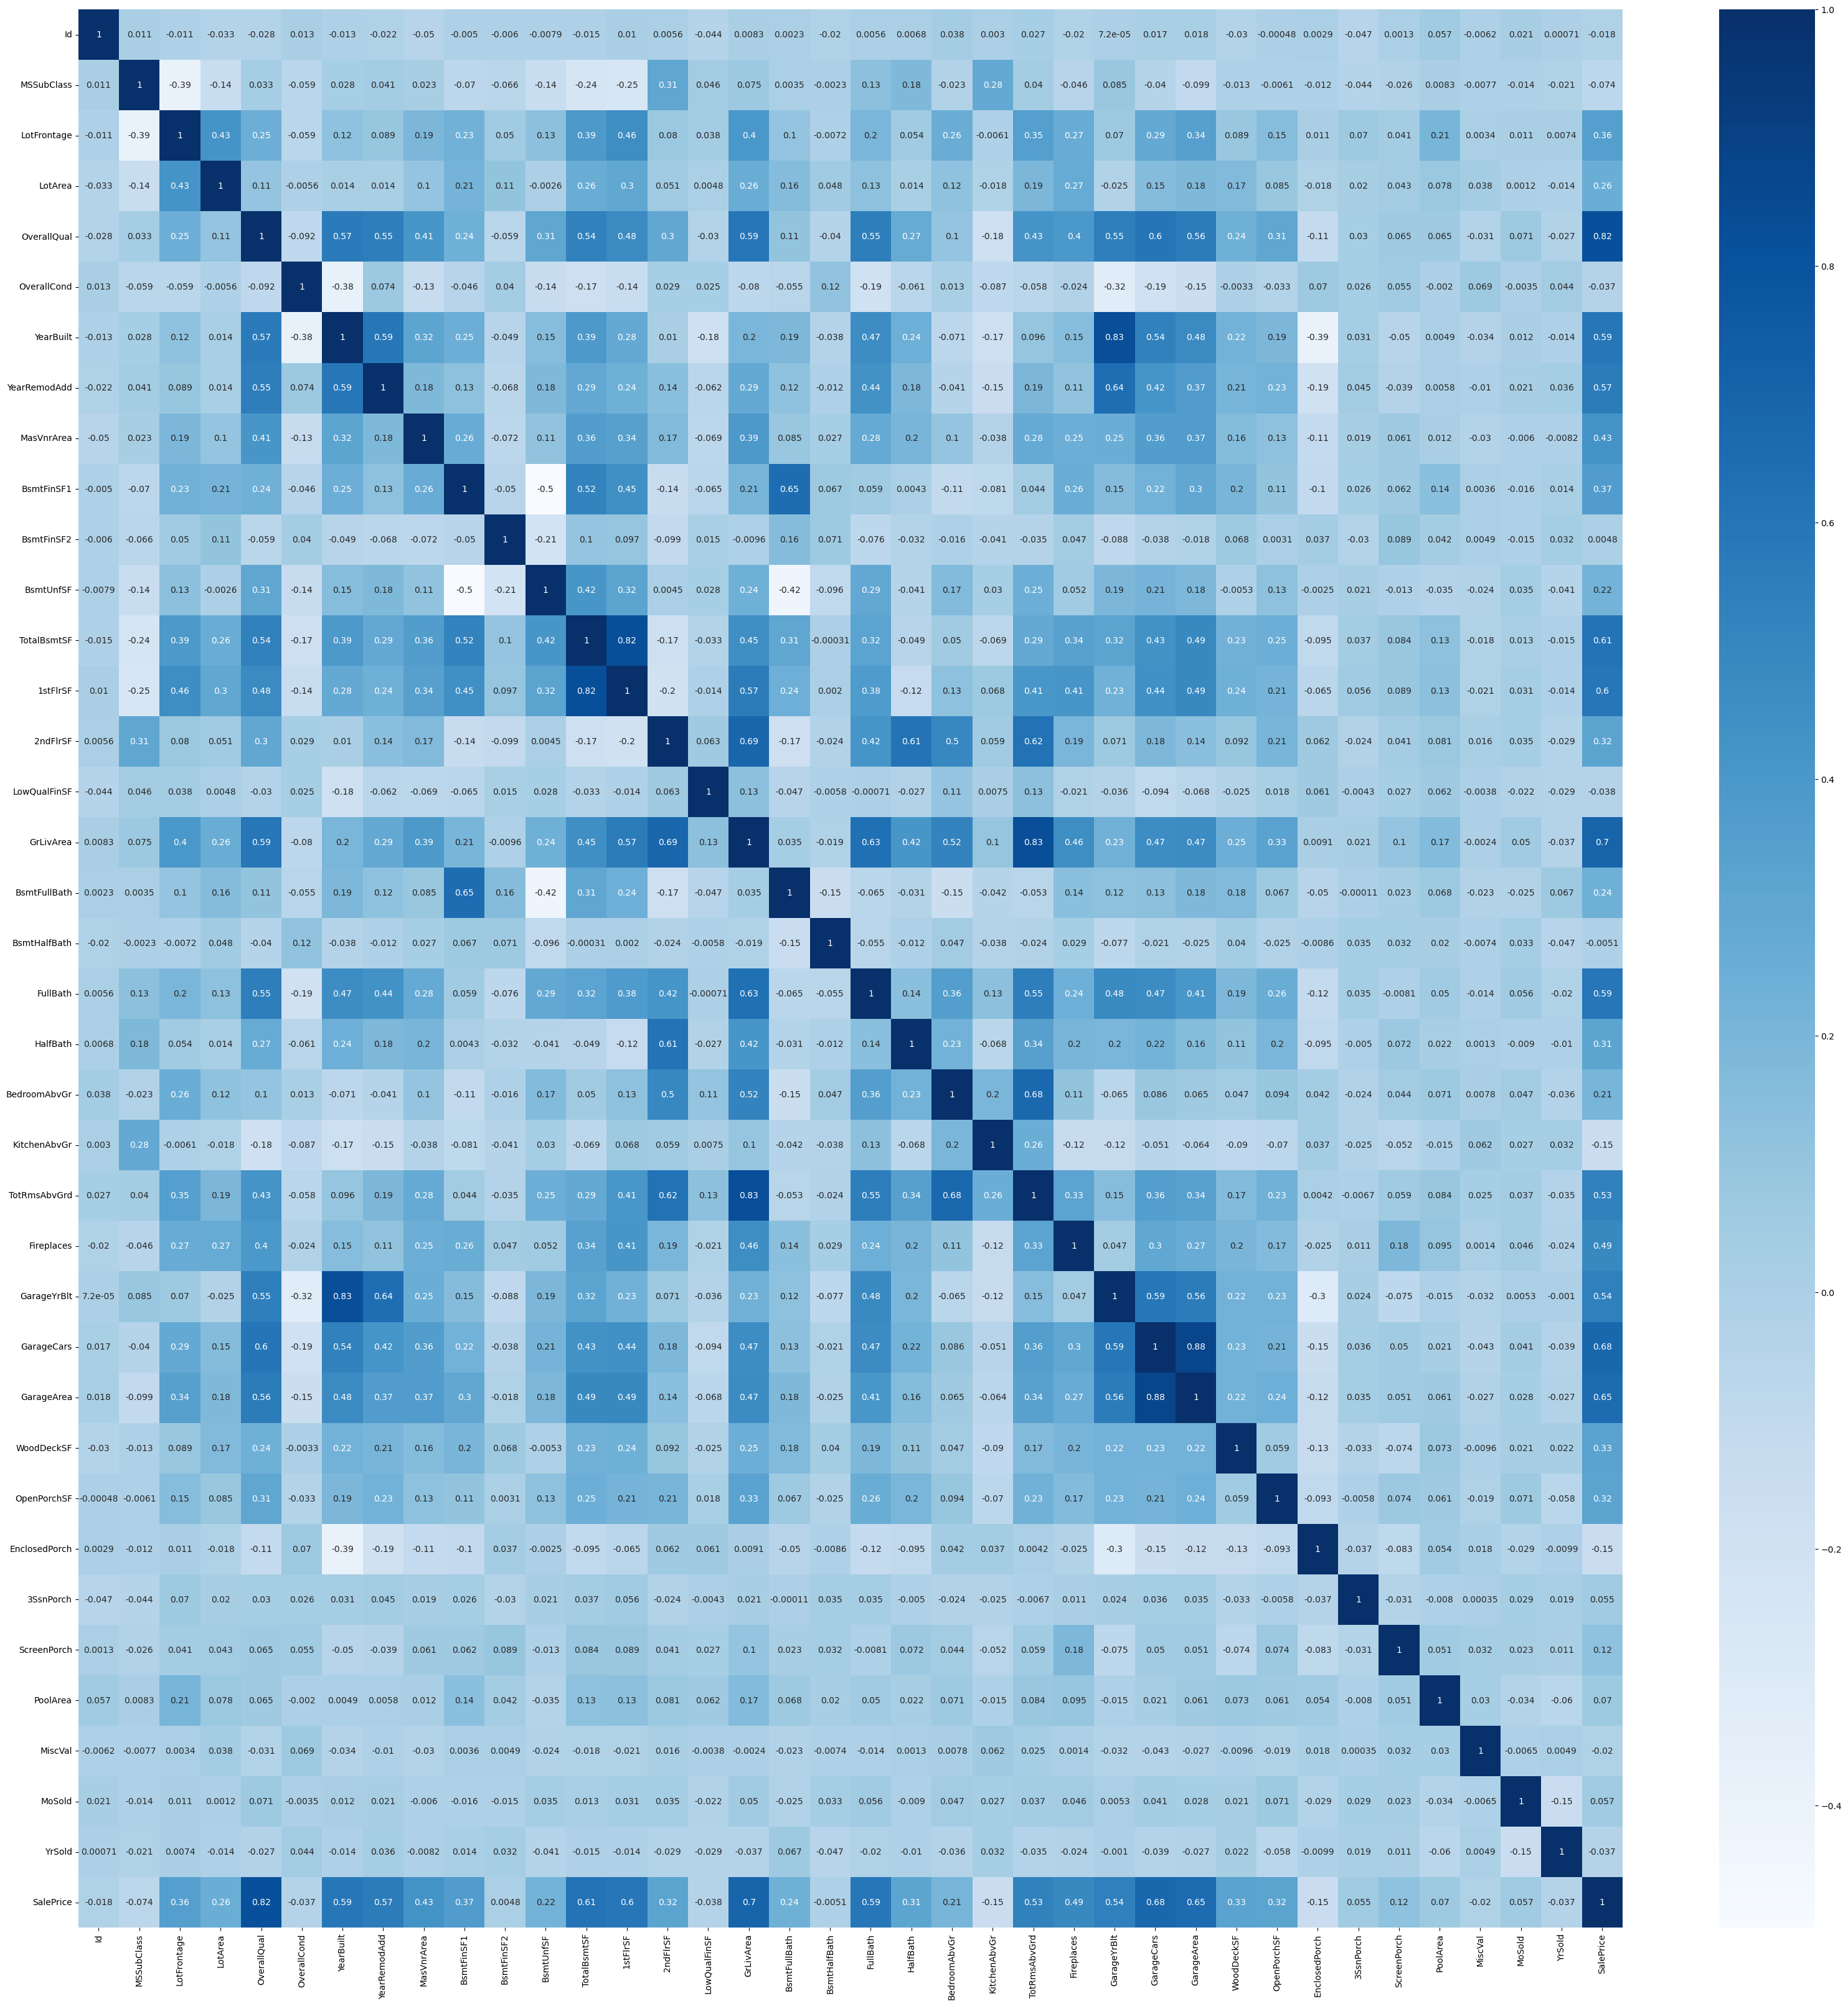

In [10]:
# Plotting the correlation matrix using heatmap

plt.figure(figsize=(40,40))
sns.heatmap(num_cols_corr_matrix, cmap='Blues', annot=True)
plt.show()

Insights from the correlation matrix : 

- SalePrice is highly(positively) correlated (>0.5) with OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea

- SalePrice is negatively correlated (but of very low values) with MSSubClass, OverallCond, BsmtFinSF2, LowQualFinSF, BsmtHalfBath, KitchenAbvGr, EnclosedPorch, MiscVal, YrSold

- We can also see collinearity among the other variables. Hence we will have to pay attention to multicollinearity while building the model.

In [11]:
# Checking for percentage of NUll/Missing Values in the Dataset
print("Percentage of NUll/Missing Values in the Dataset : ")
print(round(100*Houses.isnull().mean(), 2).sort_values(ascending=False)[round(100*Houses.isnull().mean(), 2) > 0])

Percentage of NUll/Missing Values in the Dataset : 
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64


19 feature variables have missing values, out of which 5 features have more than 40% missing values.

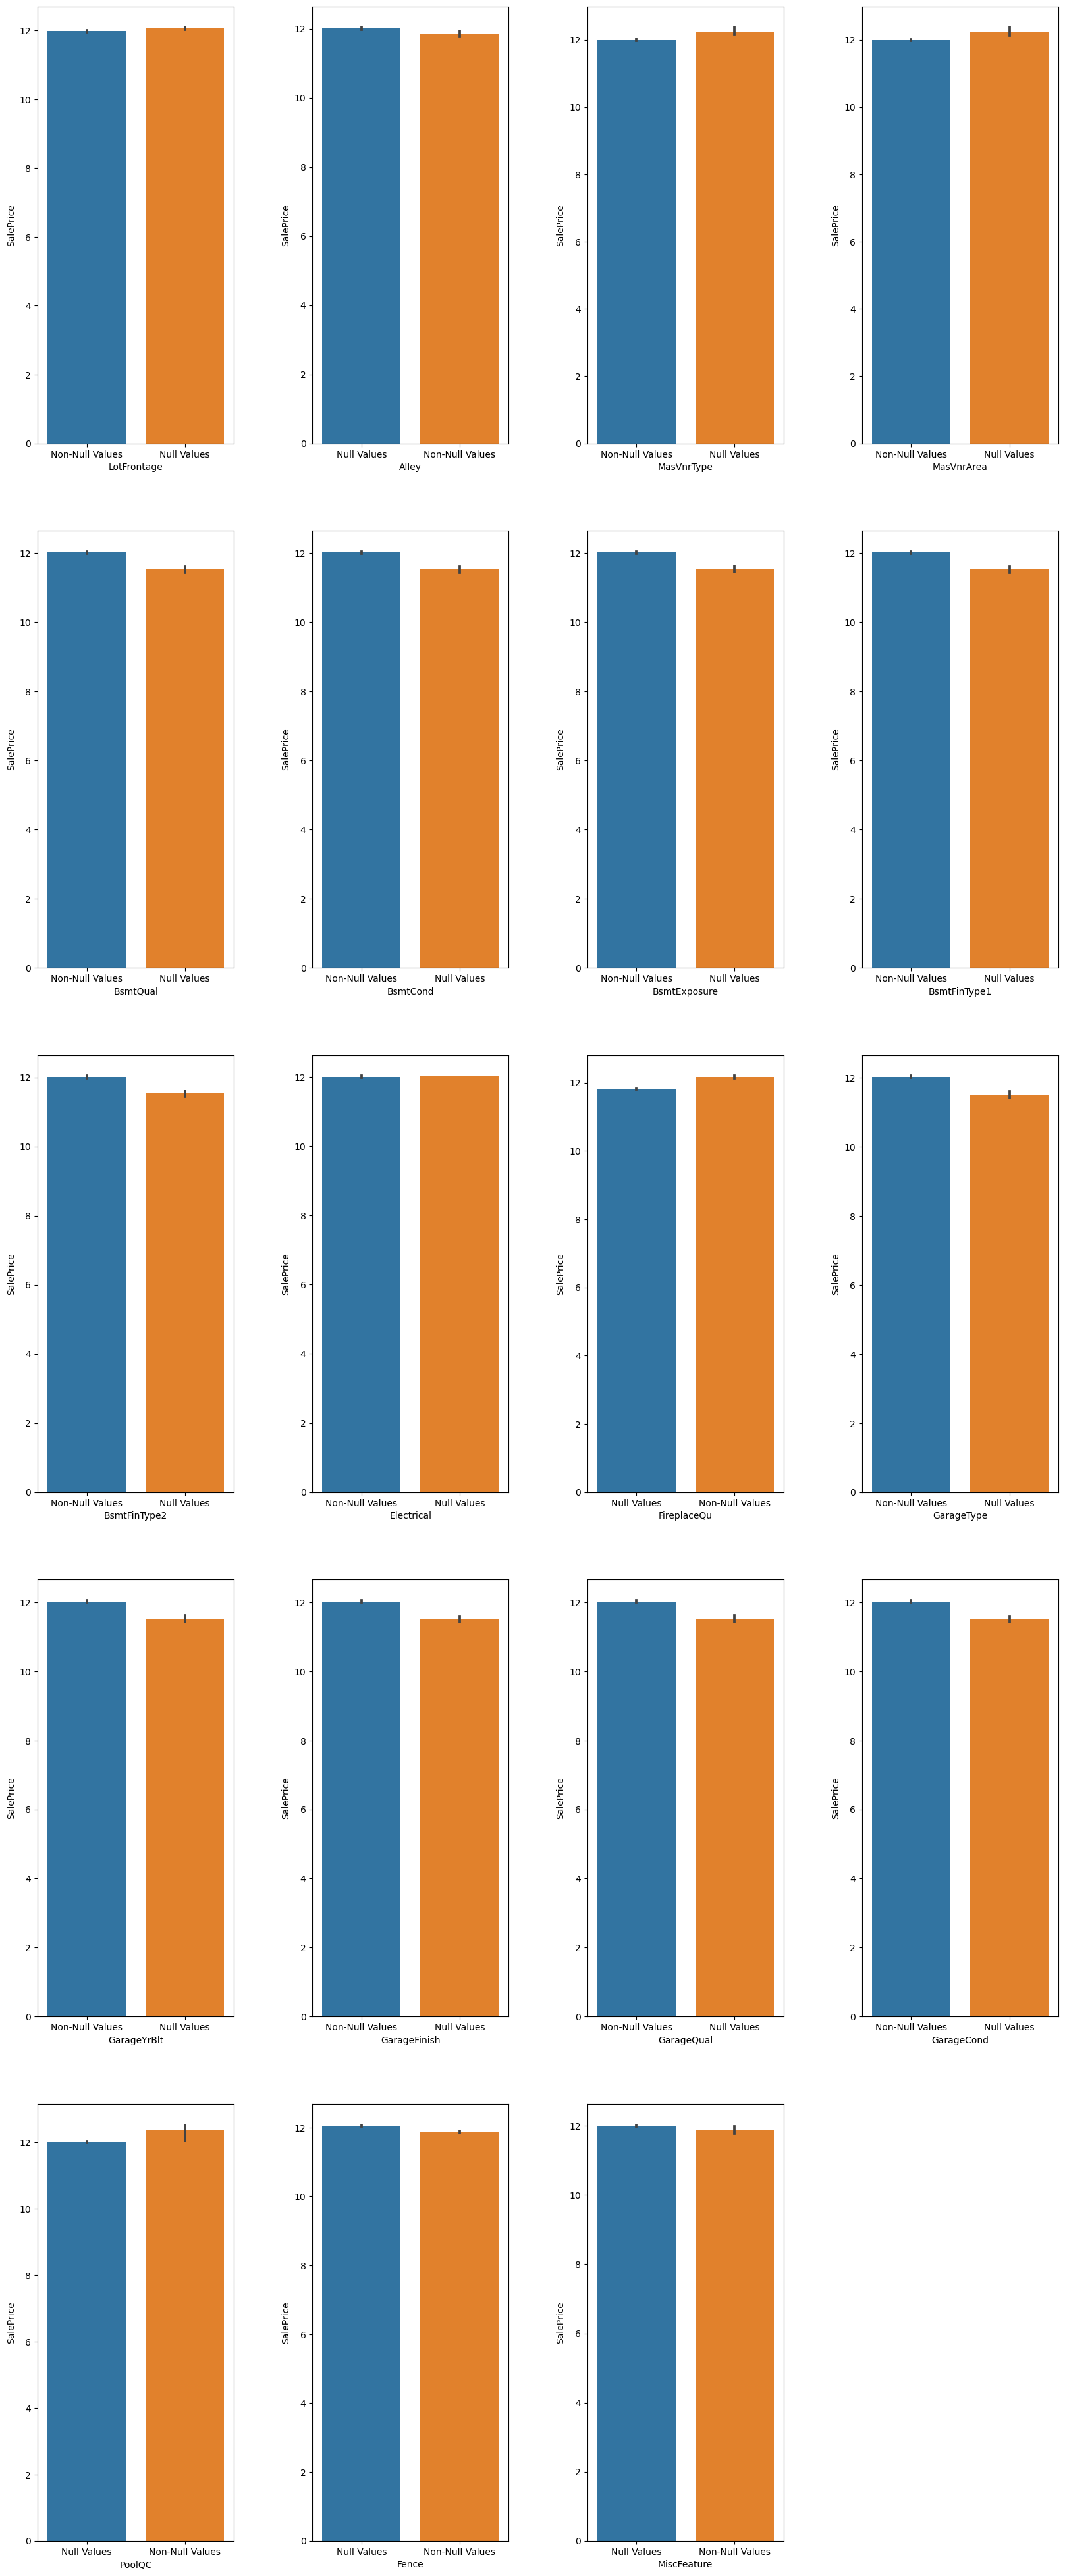

In [12]:
# Checking the impact of missing values on the target variable 'SalePrice'
nan_cols = []
for i in Houses.columns:
    if Houses[i].isnull().sum() > 0:
        nan_cols.append(i)

fig, axes= plt.subplots(5, 4, figsize=(20,50), squeeze=True)
plt.subplots_adjust(wspace=0.4, hspace=0.2)  # Adjusting the spacing between the subplots
for i,ax in zip(nan_cols, axes.flatten()):  
    Houses_copy = Houses.copy()  # Creating a copy of the original dataset  
    Houses_copy[i] = np.where(Houses_copy[i].isnull(), 'Null Values', 'Non-Null Values') 
    # Using median, as it is less sensitive to extreme values or outliers compared to the mean.
    sns.barplot(x=i, y='SalePrice', data=Houses_copy, ax=ax, estimator="median")
axes[4,3].set_axis_off()
plt.show()

We can see NaN values of some feature variables does have some impact on the 'SalePrice'

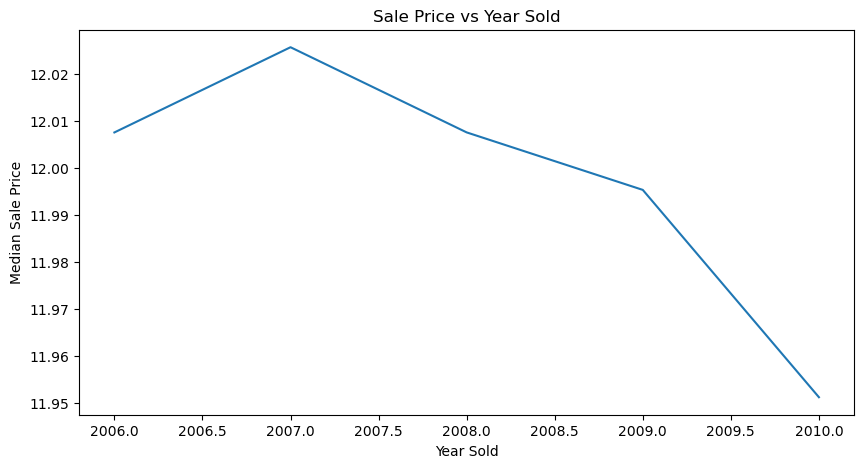

In [13]:
# Check for the SalePrice with year sold 
plt.figure(figsize=(10,5))
Houses.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median Sale Price')
plt.title('Sale Price vs Year Sold')
plt.show()

We can see the median price is higher in the year 2007 & started declining from the year 2008. This can attributed to the housing market bubble burst in 2008, when subprime mortgages, a huge consumer debt load, and crashing home values converged.

In [14]:
# Dropping the 'Id' & 'MSSubClass', column as these are not required for the analysis
Houses.drop(['Id', 'MSSubClass'], axis=1, inplace=True)

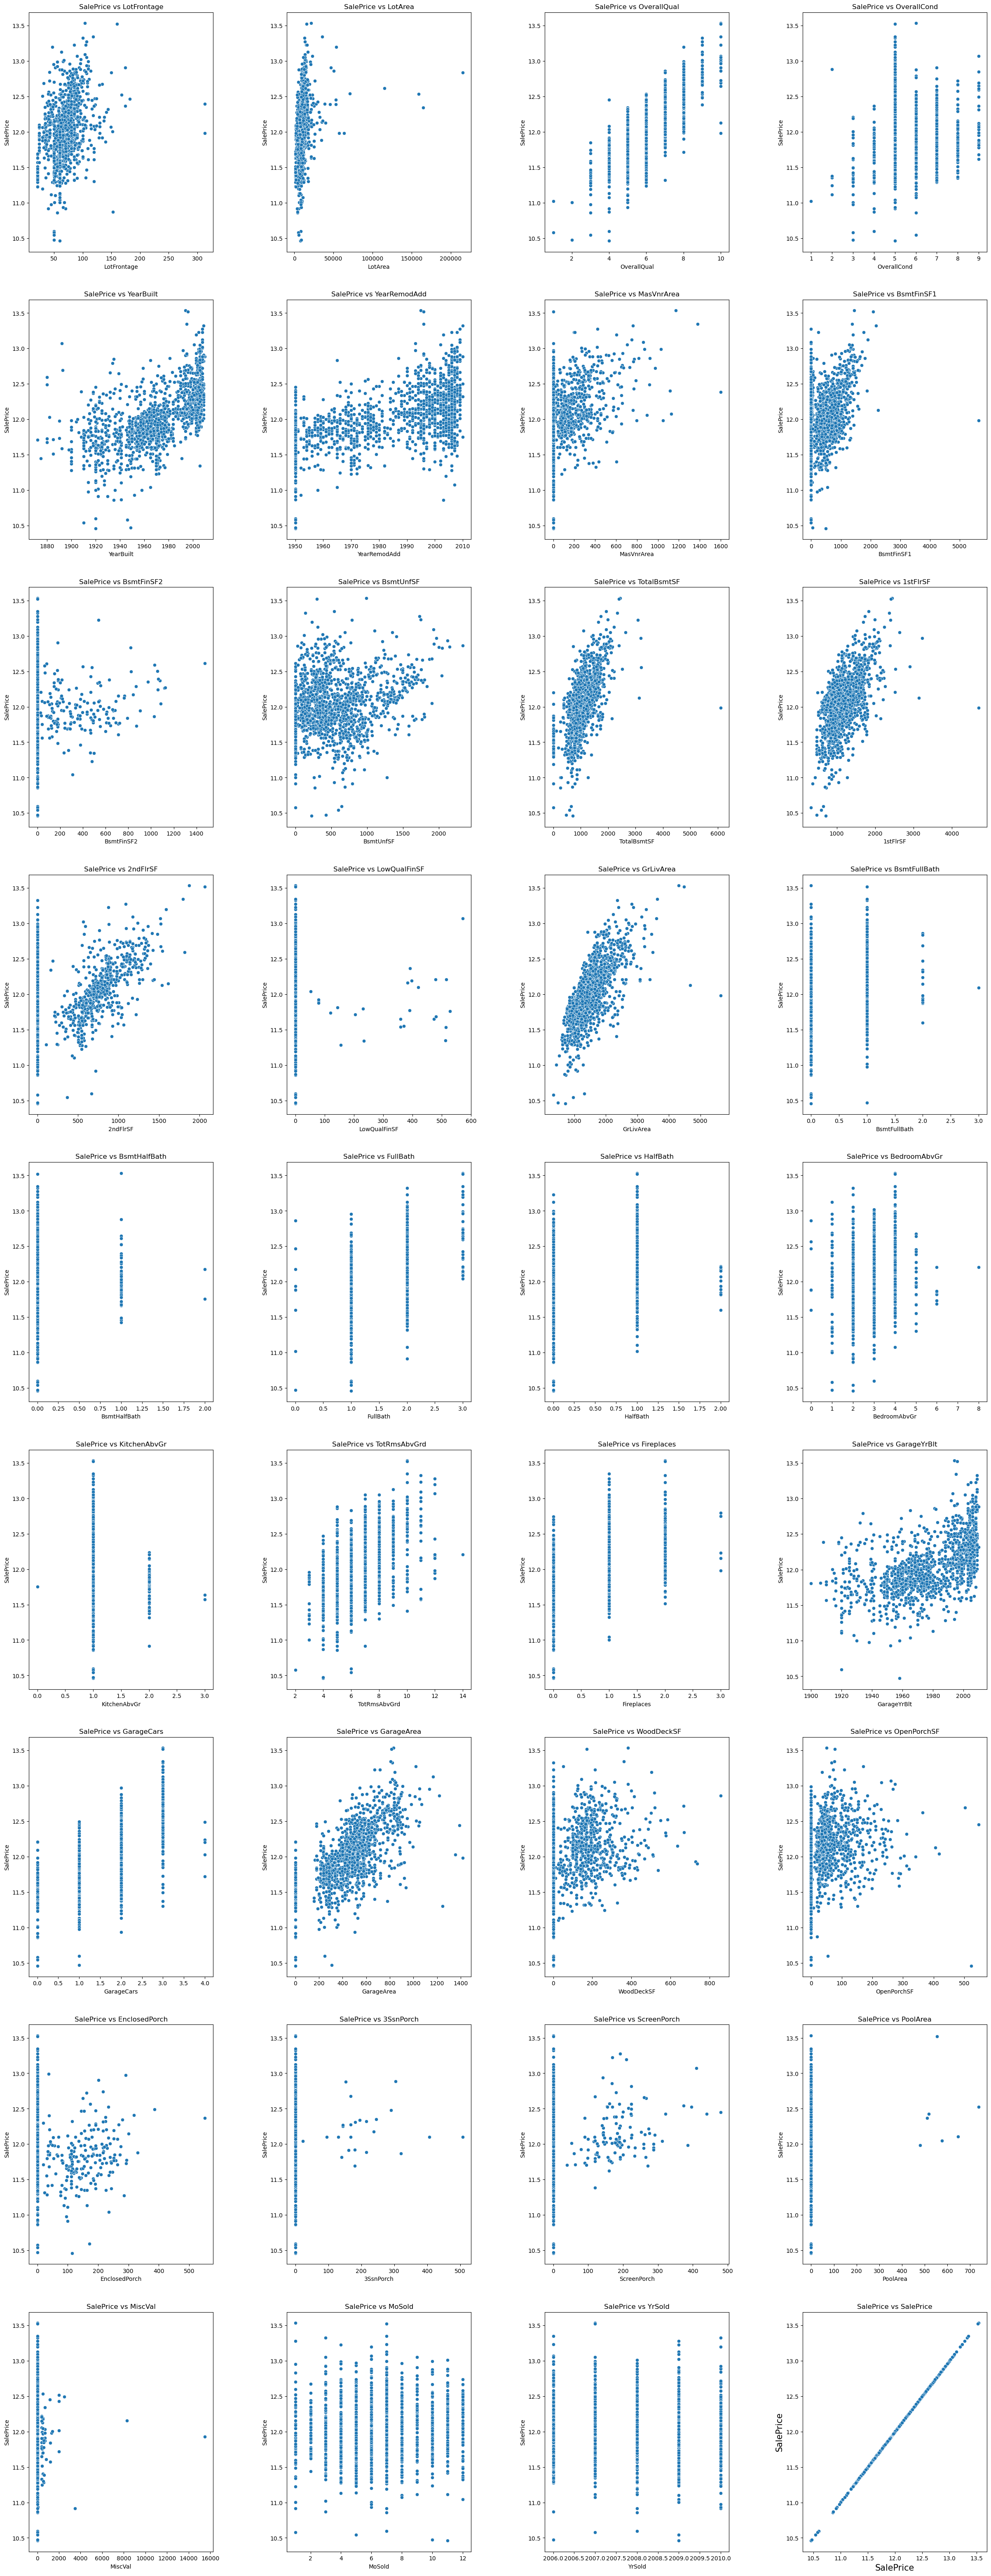

In [15]:
# Visualising the change of target variable 'SalePrice' w.r.t the numerical type feature variables

# Updating the numerical columns list
num_cols = Houses.select_dtypes(include=['float64','int64']).columns

fig, axes= plt.subplots(9, 4, figsize=(30,80))
plt.subplots_adjust(wspace=0.4, hspace=0.2)  # Adjusting the spacing between the subplots
for i,ax in zip(Houses[num_cols], axes.flatten()):
    sns.scatterplot(x=i, y='SalePrice', data=Houses, ax=ax)
    plt.xlabel(i, fontsize=15)
    plt.ylabel('SalePrice', fontsize=15)
    ax.set_title('SalePrice'+' vs '+str(i))

Observations :
- We can see price of the buildings are increasing as the year passes i.e., the newer buldings are pricier than the older ones, which can be seen by the 'SalePrice' vs 'YearBuilt'.
- Similar pattern can be seen with the Year modelled as well.
- Price increases with increase in the Overall Quality Rating ('OverallQual')
- Total basement area ('TotalBsmtSF') is directly proportional to the price of the property. 
- GRLiving Area ('GrLivArea') has a direct correlation with the price of the property.
- Month sold ('MoSold') & Year sold ('YrSold') doesn't show any impact in the increase of SalePrice

In [16]:
# Catgorical Columns in the dataset
cat_cols = Houses.select_dtypes(include=['object']).columns
print("No. of categorical columns : ",len(cat_cols))

No. of categorical columns :  43


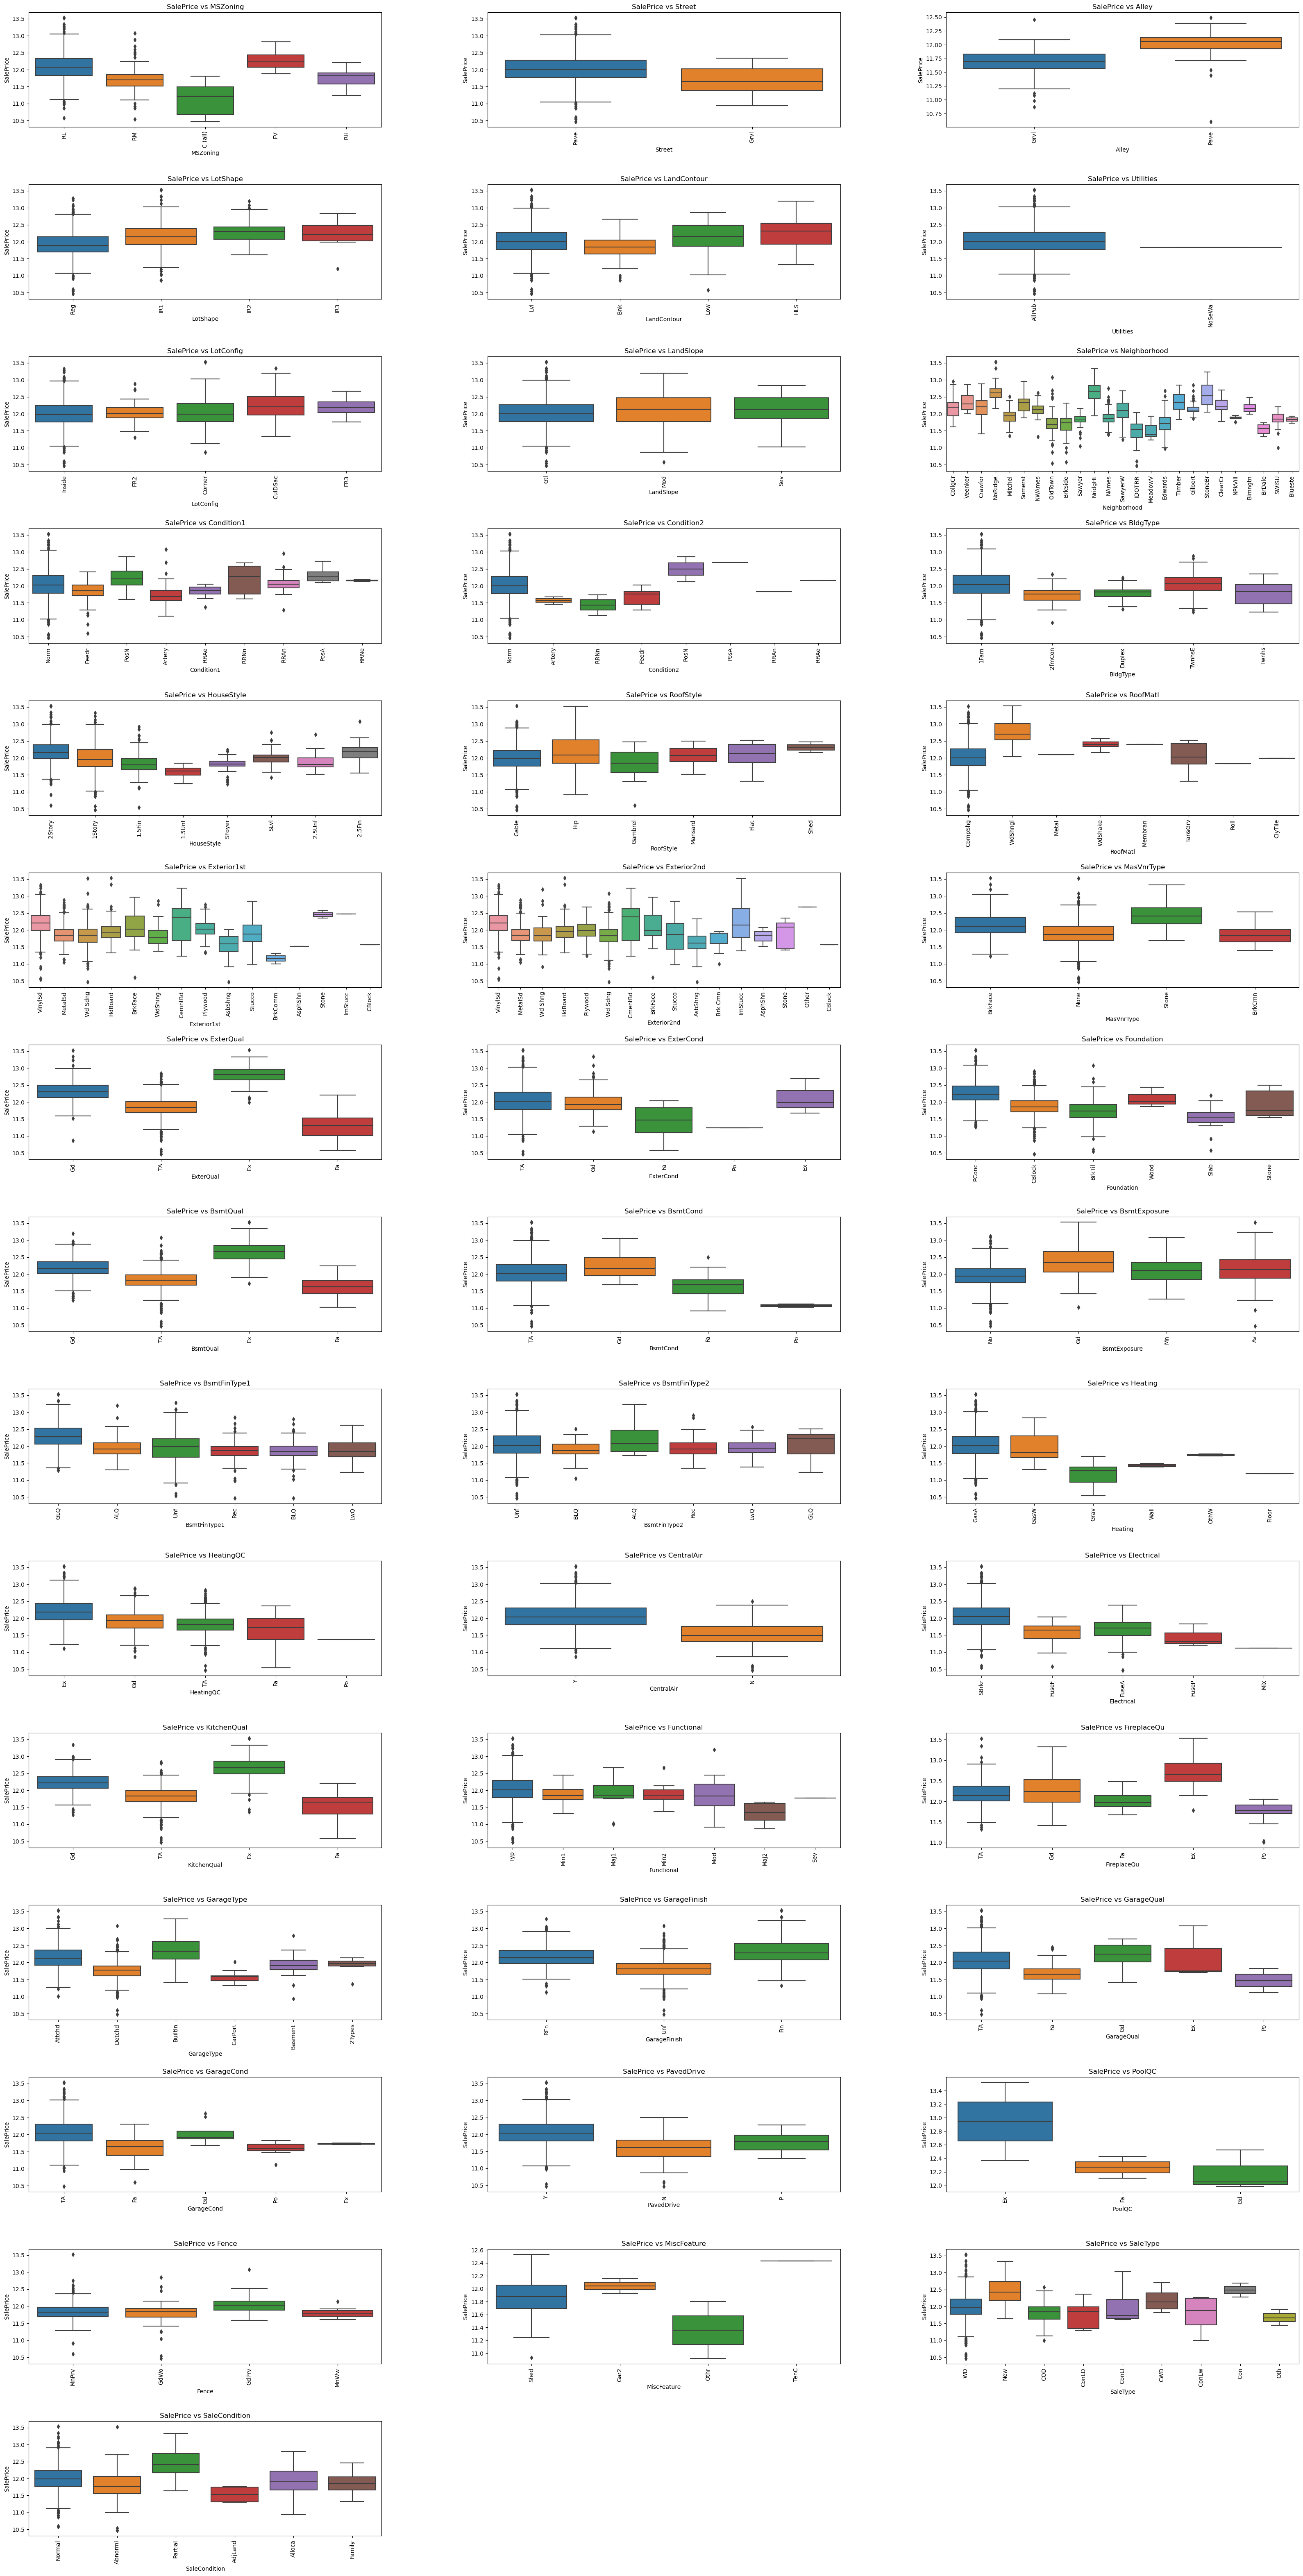

In [17]:
# Visualising the target variable 'SalePrice' w.r.t the categorical type feature variables

fig, axes = plt.subplots(15, 3, figsize=(40,80))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
for i,ax in zip(cat_cols, axes.flatten()):
    sns.boxplot(x=i, y='SalePrice', data=Houses, ax=ax)
    plt.xlabel(i, fontsize=15)
    plt.ylabel('SalePrice', fontsize=15)
    ax.set_title('SalePrice'+' vs '+str(i))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
axes[14,1].set_axis_off()
axes[14,2].set_axis_off()
plt.show()


Observations : 
- Houses with paved alley are better priced compared to gravel alley.
- Houses with roof material made up of wood shingles are better priced.
- We can see the median price increases with increase in the Exterior Material Quality('ExterQual').
- Same goes with Height of Basement ('BsmtQual').
- Price increases with imporvement in the Basement condition ('BsmtCond').
- House with central air conditioning is pricier than without.
- Price increases with increase in the fireplace quality.
- House with excellent qulaity are very expensive.
- Homes which are about to complete are on the expensive side compared to other sale conditions.


# Data Cleaning & Preprocessing

Adding new columns to the dataset ( Derived Columns )

In [18]:
Houses['Age'] = Houses['YrSold'] - Houses['YearBuilt']
Houses['GarageAge'] = Houses['YrSold'] - Houses['GarageYrBlt']
Houses['RemodelAge'] = Houses['YrSold'] - Houses['YearRemodAdd']
Houses['TotalAreaSF'] = Houses['TotalBsmtSF'] + Houses['GrLivArea'] + Houses['1stFlrSF'] + Houses['2ndFlrSF']
Houses['TotalPorchSF'] = Houses['OpenPorchSF'] + Houses['EnclosedPorch'] + Houses['3SsnPorch'] + Houses['ScreenPorch']

# Dropping the columns 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold',
# as they are not required for further analysis
Houses.drop(['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold'], axis=1, inplace=True)


In [19]:
# Converting 'MoSold' to categorical variable i.e., 
# 1 - Jan, 2 - Feb, 3 - Mar, 4 - Apr, 5 - May, 6 - Jun, 
# 7 - Jul, 8 - Aug, 9 - Sep, 10 - Oct, 11 - Nov, 12 - Dec
Houses['MoSold'] = Houses['MoSold'].map({
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
})

Handling Missing Values

In [20]:
# Print the column names with missing values along with the percentage of missing values & data type of the column in a single table
print(pd.DataFrame({'Missing Values (%)':round(100*Houses.isnull().mean(), 2).sort_values(ascending=False)[round(100*Houses.isnull().mean(), 2) > 0], 'Data Type':Houses[round(100*Houses.isnull().mean(), 2).sort_values(ascending=False)[round(100*Houses.isnull().mean(), 2) > 0].index].dtypes}))


              Missing Values (%) Data Type
PoolQC                     99.52    object
MiscFeature                96.30    object
Alley                      93.77    object
Fence                      80.75    object
FireplaceQu                47.26    object
LotFrontage                17.74   float64
GarageQual                  5.55    object
GarageCond                  5.55    object
GarageAge                   5.55   float64
GarageFinish                5.55    object
GarageType                  5.55    object
BsmtExposure                2.60    object
BsmtFinType2                2.60    object
BsmtFinType1                2.53    object
BsmtQual                    2.53    object
BsmtCond                    2.53    object
MasVnrType                  0.55    object
MasVnrArea                  0.55   float64
Electrical                  0.07    object


For the categorical variables, we impute the missing values with None, & for numerical variables with 0, since by intuion it is assumed that when a certain feature is missing in that property, it is left blank during data collection because of its absence.

In [21]:
# For the following columns, the missing values are to be replaced with 'None' as per the data description file

# No Pool : PoolQC
Houses['PoolQC'].fillna('None', inplace=True)
# No Miscellaneous Feature : MiscFeature
Houses['MiscFeature'].fillna('None', inplace=True)
# No Alley access : Alley
Houses['Alley'].fillna('None', inplace=True)
# No Fence : Fence
Houses['Fence'].fillna('None', inplace=True)
# No Fireplace : FireplaceQu
Houses['FireplaceQu'].fillna('None', inplace=True)
# No Garage : GarageAge, GarageCond, GarageType, GarageFinish, GarageQual
Houses['GarageAge'].fillna(0, inplace=True)
Houses['GarageCond'].fillna('None', inplace=True)
Houses['GarageType'].fillna('None', inplace=True)
Houses['GarageFinish'].fillna('None', inplace=True)
Houses['GarageQual'].fillna('None', inplace=True)
# No Basement : BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtCond, BsmtQual
Houses['BsmtExposure'].fillna('None', inplace=True)
Houses['BsmtFinType1'].fillna('None', inplace=True)
Houses['BsmtFinType2'].fillna('None', inplace=True)
Houses['BsmtCond'].fillna('None', inplace=True)
Houses['BsmtQual'].fillna('None', inplace=True)
# No Masonry veneer : MasVnrType
Houses['MasVnrType'].fillna('None', inplace=True)
Houses['MasVnrArea'].fillna(0, inplace=True)

# Filling the missing values with the mode of the column
Houses['Electrical'].fillna(Houses['Electrical'].mode()[0], inplace=True)

# Filling the missing values with the median of the respective neighbourhood group
Houses['LotFrontage'] = Houses.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


In [22]:
# Checking for percentage of NUll/Missing Values in the Dataset again
print(round(100*Houses.isnull().mean(), 2).sort_values(ascending=False))

MSZoning        0.0
LotFrontage     0.0
GarageQual      0.0
GarageArea      0.0
GarageCars      0.0
               ... 
Foundation      0.0
ExterCond       0.0
ExterQual       0.0
MasVnrArea      0.0
TotalPorchSF    0.0
Length: 80, dtype: float64


In [23]:
# Checking the features with more than 95% same values
features_with_95_percent_same_values = []
for i in Houses.columns:
    if(Houses[i].dtype == 'object'):
        # Since value_counts() by default sorts the values in descending order, the first value in the list will be the most frequent value
        if Houses[i].value_counts()[0] >= 0.95*1460:
            features_with_95_percent_same_values.append(i)
            print(i)
            print(Houses[i].value_counts())
            print('\n')

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64


Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64


RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64


Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


PoolQC
None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64


MiscFeature
None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64




In [24]:
print("The following features have 95% or more same values : \n", features_with_95_percent_same_values)

print("\nThese features can be dropped as they do not contribute to the analysis")

The following features have 95% or more same values : 
 ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', 'MiscFeature']

These features can be dropped as they do not contribute to the analysis


In [25]:
# Dropping the above features from the dataset
Houses.drop(features_with_95_percent_same_values, axis=1, inplace=True)

In [26]:
Houses.shape

(1460, 73)

In [27]:
Houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Alley          1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

In [28]:
# Updating the numerical columns list
num_cols = Houses.select_dtypes(include=['float64','int64']).columns
print("No. of numerical columns : ", len(num_cols))

No. of numerical columns :  36


Outlier Treatment 

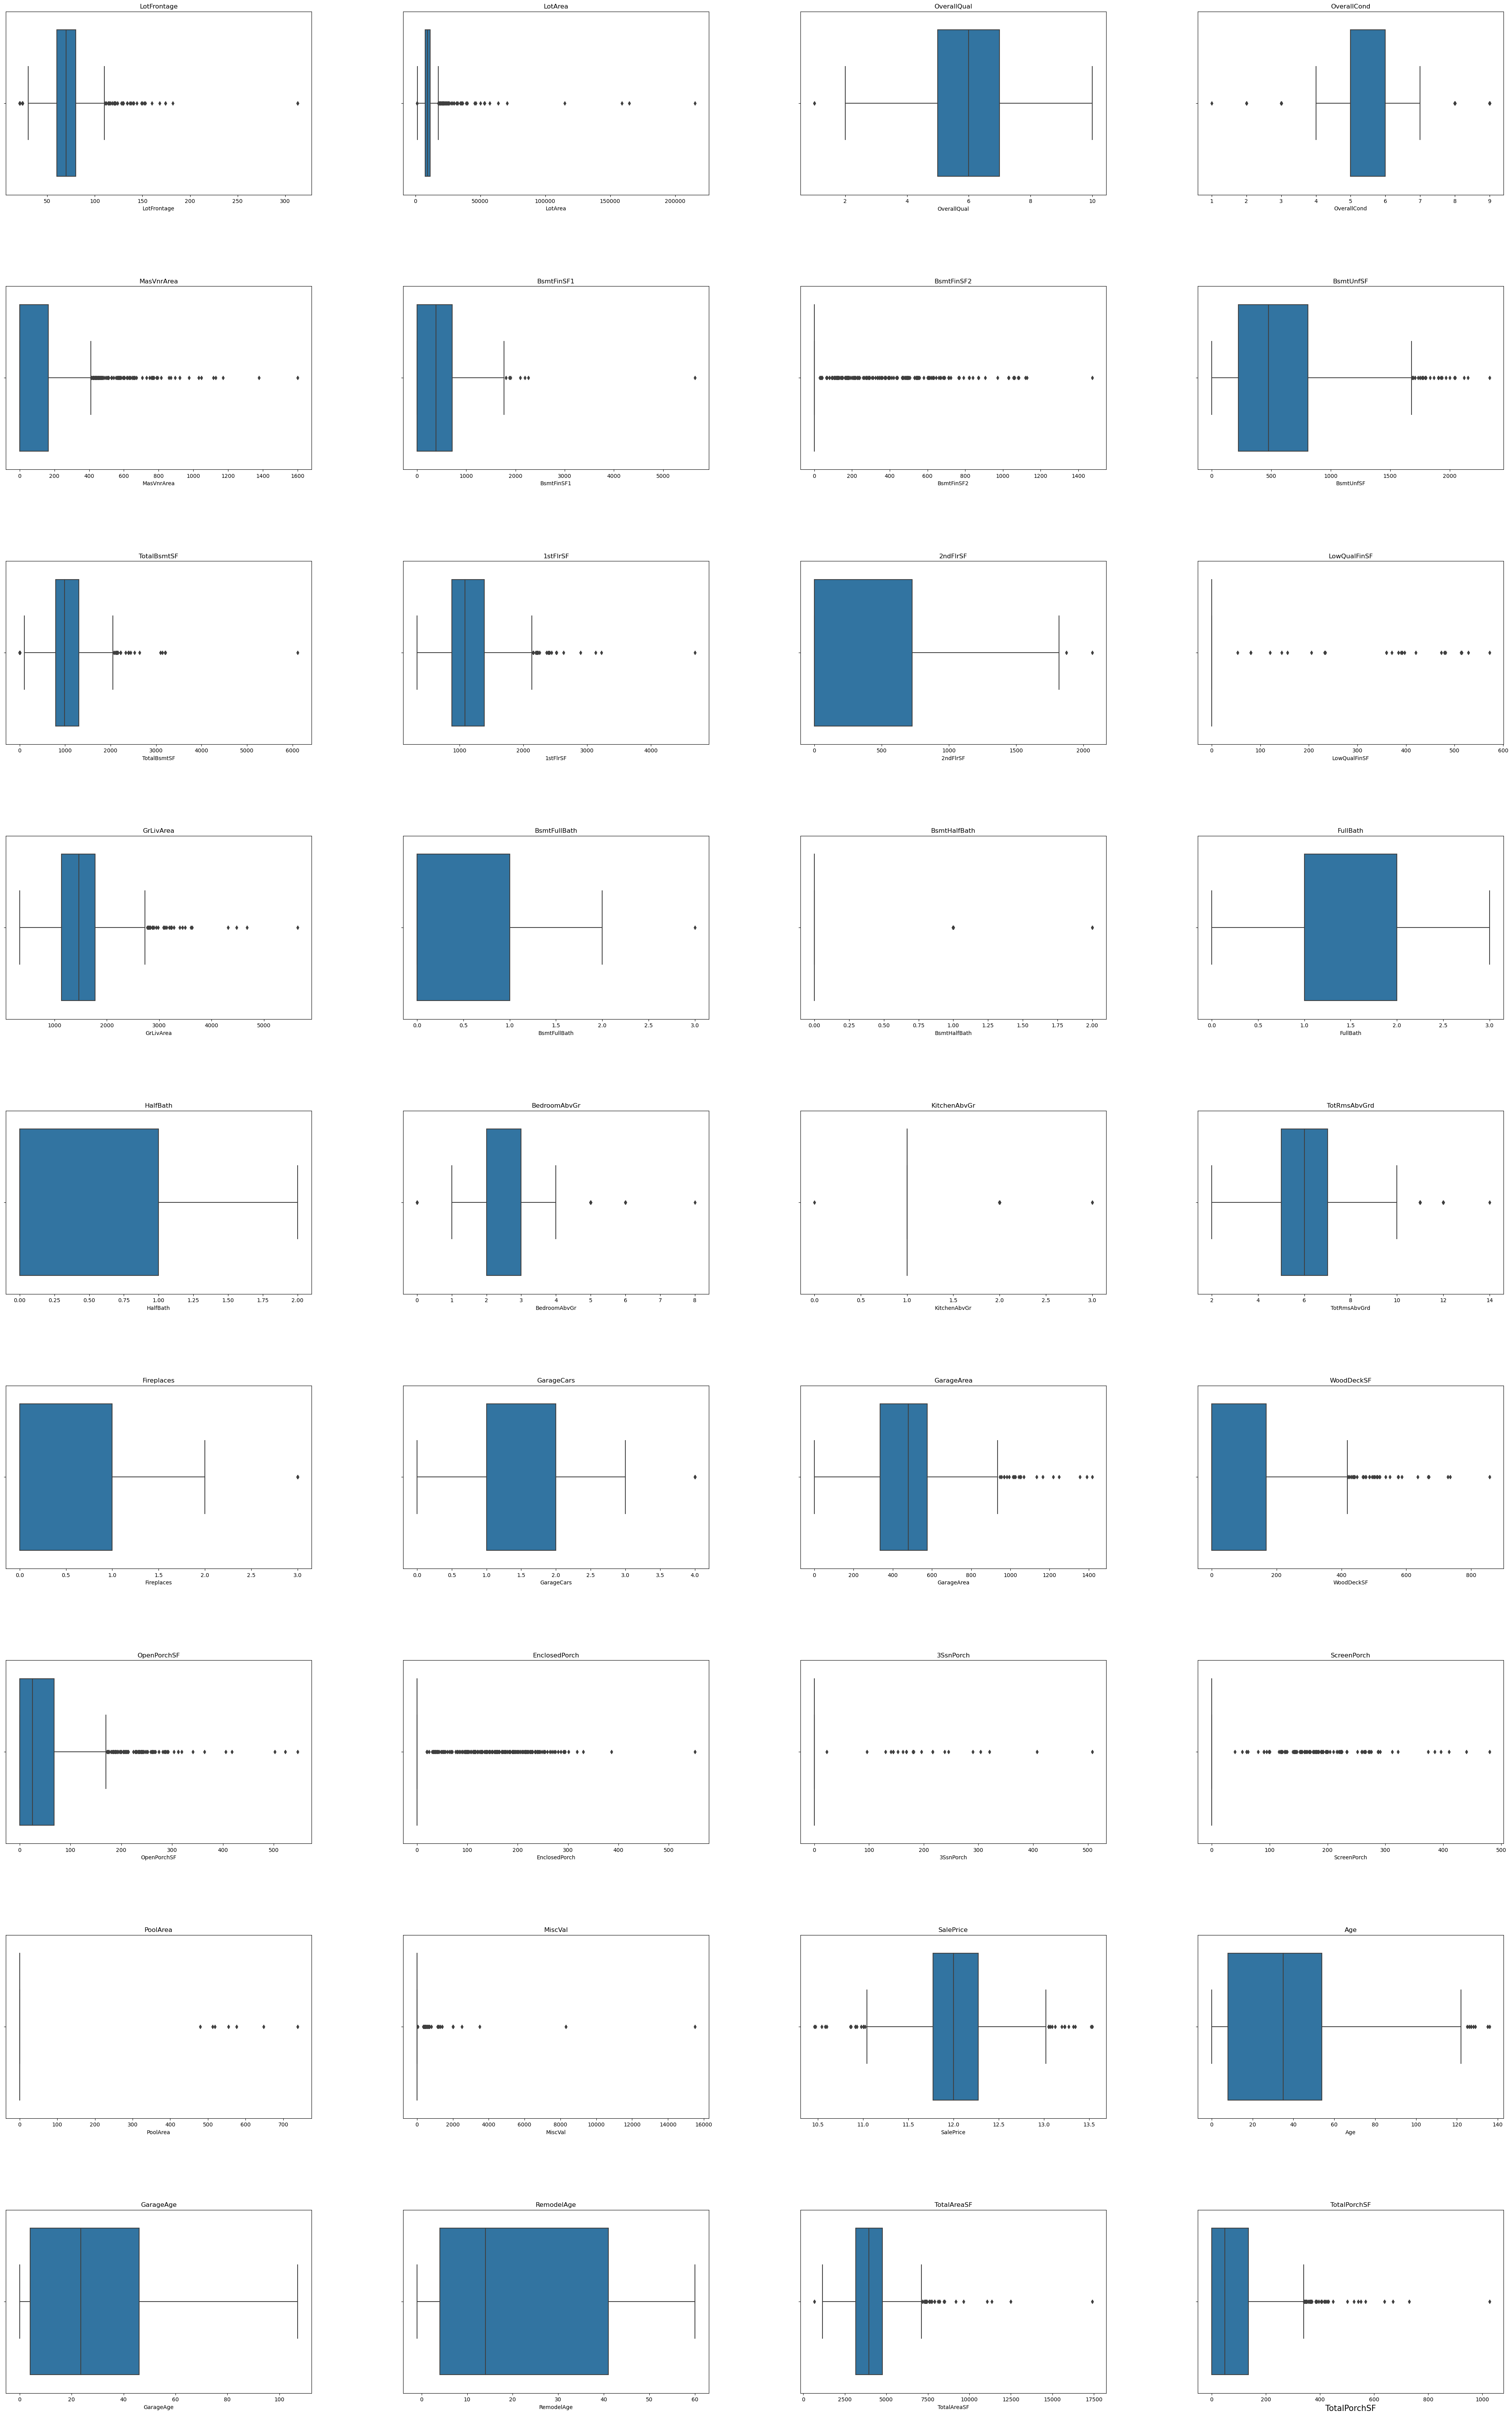

In [29]:
# Create a box plot for each numeric feature variable in the dataset
fig, axes = plt.subplots(9, 4, figsize=(50,80))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
for i,ax in zip(num_cols, axes.flatten()):
    sns.boxplot(x=i, data=Houses, ax=ax)
    plt.xlabel(i, fontsize=15)
    ax.set_title(str(i))

From the above plots we can see that, the following variables have outliers :
- LotFrontage
- LotArea
- MasVnrArea
- TotalBsmtSF
- GrLivArea
- GarageArea
- TotalAreaSF
- TotalPorchSF

Also we can see Outliers in some more variables but we will not drop them since this may lead to data loss , the outliers will be treated during min-max ( normalisation ) scaling as handling outliers could lead us to data loss.

In [30]:
# Outlier Treatment functions
def outlier_filter(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 *IQR
    lower_bound = Q1 - 1.5 * IQR

    filter = (df[column] >= lower_bound) & (df[column] <= upper_bound)

    return filter

def outlier_comparison(df, column):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3))

    # box plot before dropping outliers
    sns.boxplot(df[column], ax=ax1, orient="h")
    ax1.set_title(column + ' - Original')
    
    new_df = df[outlier_filter(df, column)]

    # box plot after dropping outliers    
    sns.boxplot(new_df[column], ax=ax2, orient="h")
    ax2.set_title(column + ' - Post Outlier Treatment')

    plt.show()


def remove_outliers(df, column):

    old_rows = len(df)

    new_df = df[outlier_filter(df, column)]

    new_rows = len(new_df)

    print('Rows dropped: ', old_rows - new_rows)
    print('Percentage rows dropped: ', round((old_rows - new_rows)/old_rows*100,2), "%")
    
    return new_df

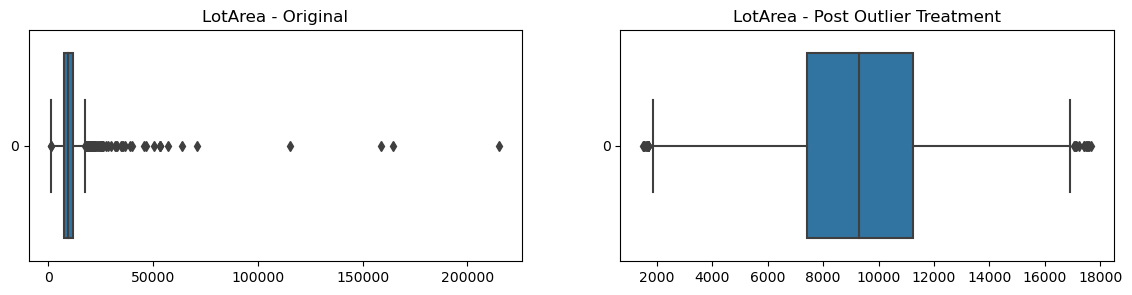

Rows dropped:  69
Percentage rows dropped:  4.73 %


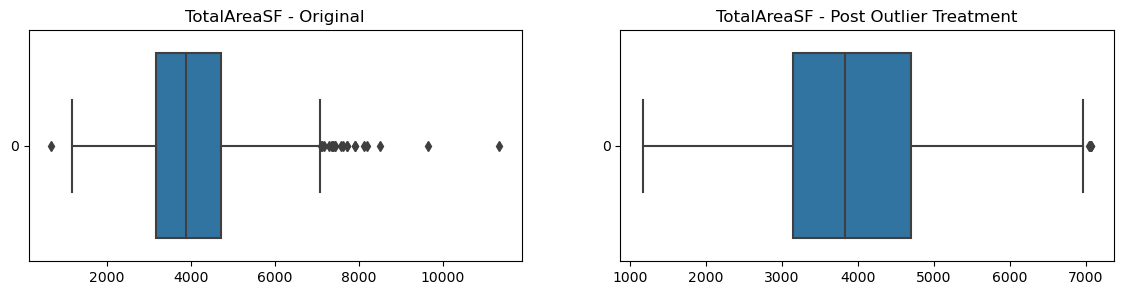

Rows dropped:  22
Percentage rows dropped:  1.58 %


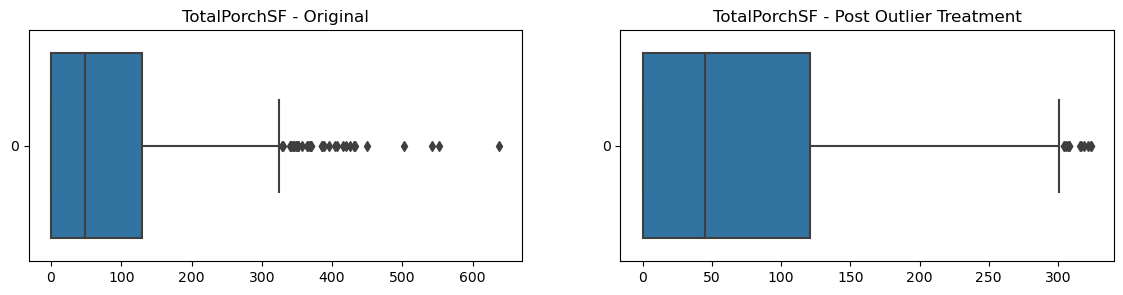

Rows dropped:  38
Percentage rows dropped:  2.78 %


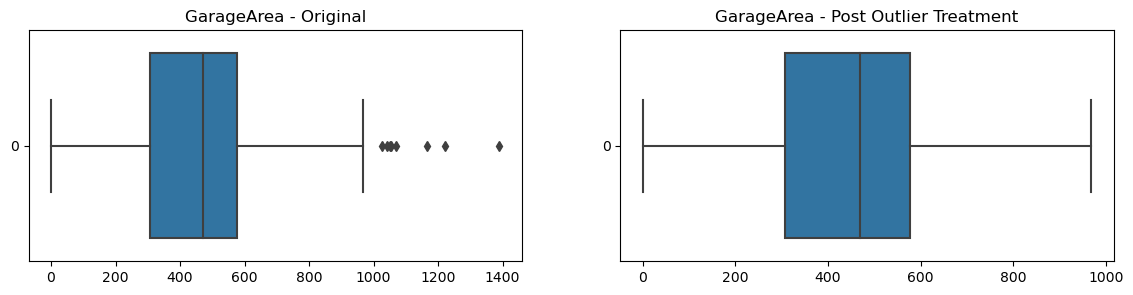

Rows dropped:  8
Percentage rows dropped:  0.6 %
Initial rows :  1460
Final rows :  1323
Percentage of data removed in total:  9.38 %


In [31]:

# List of columns for outlier treatment :

outlier_list = ['LotArea', 'TotalAreaSF', 'TotalPorchSF', 'GarageArea']

Initial_count = len(Houses)

for column in outlier_list:
    outlier_comparison(Houses, column)
    Houses = remove_outliers(Houses, column)

# calculate percentage of data removed
print("Initial rows : ", Initial_count)
print("Final rows : ", len(Houses))
print("Percentage of data removed in total: ", round((1 - len(Houses)/Initial_count) * 100, 2), "%")

In [32]:
Houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1323 non-null   object 
 1   LotFrontage    1323 non-null   float64
 2   LotArea        1323 non-null   int64  
 3   Alley          1323 non-null   object 
 4   LotShape       1323 non-null   object 
 5   LandContour    1323 non-null   object 
 6   LotConfig      1323 non-null   object 
 7   LandSlope      1323 non-null   object 
 8   Neighborhood   1323 non-null   object 
 9   Condition1     1323 non-null   object 
 10  BldgType       1323 non-null   object 
 11  HouseStyle     1323 non-null   object 
 12  OverallQual    1323 non-null   int64  
 13  OverallCond    1323 non-null   int64  
 14  RoofStyle      1323 non-null   object 
 15  Exterior1st    1323 non-null   object 
 16  Exterior2nd    1323 non-null   object 
 17  MasVnrType     1323 non-null   object 
 18  MasVnrAr

Dummy Variable Creation

In [33]:
cat_cols = Houses.select_dtypes(include=['object']).columns

# Creating dummy variables for the categorical columns
Houses = pd.get_dummies(Houses, columns=cat_cols, drop_first=True)
Houses.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0           0        150          856       856  ...               0   
1           0        284         1262      1262  ...               0   
2           0        434          920       920  ...               0   
3           0        540          756       961  ...               0   
4           0        490         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 240 columns]

In [34]:
Houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 0 to 1459
Columns: 240 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(4), int64(32), uint8(204)
memory usage: 646.0 KB


In [35]:
Houses.describe()

LotFrontage       LotArea  OverallQual  OverallCond   MasVnrArea  \
count  1323.000000   1323.000000  1323.000000  1323.000000  1323.000000   
mean     68.351096   9138.702948     6.024187     5.581255    92.931217   
std      19.112893   3159.511723     1.325083     1.110402   161.274296   
min      21.000000   1491.000000     1.000000     1.000000     0.000000   
25%      60.000000   7282.500000     5.000000     5.000000     0.000000   
50%      70.000000   9156.000000     6.000000     5.000000     0.000000   
75%      80.000000  11075.000000     7.000000     6.000000   149.500000   
max     182.000000  17671.000000    10.000000     9.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1323.000000  1323.000000  1323.000000  1323.000000  1323.000000  ...   
mean    421.483749    43.136054   556.453515  1021.073318  1124.792895  ...   
std     414.180013   153.150464   431.071563   386.386510   336.460714  ...   
min       0.000000     0.000000     0.000000     0.000000   372.000000  ...   
25%       0.000000     0.000000   222.000000   783.500000   865.500000  ...   
50%     375.000000     0.000000   467.000000   970.000000  1061.000000  ...   
75%     690.000000     0.000000   785.000000  1248.000000  1337.500000  ...   
max    2188.000000  1474.000000  2121.000000  3206.000000  2364.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count     1323.000000     1323.000000   1323.000000   1323.000000   
mean         0.003779        0.003023      0.076342      0.002268   
std          0.061383        0.054923      0.265644      0.047583   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1323.000000            1323.000000           1323.000000   
mean      0.875283               0.003023              0.006803   
std       0.330522               0.054923              0.082229   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1323.000000           1323.000000            1323.000000  
mean               0.015117              0.828420               0.077853  
std                0.122065              0.377157               0.268042  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 240 columns]

In [36]:
# y to contain only target variable
y = Houses.pop('SalePrice')

# X contains all the remaining independent variables
X = Houses

In [37]:
# Checking Multi-Collinearity
multi_collinearity_check_corr = X.corr()
multi_collinearity_check_corr1 = multi_collinearity_check_corr[abs(multi_collinearity_check_corr) >= 0.7]  # Considering only those values which are greater than 0.7
multi_collinearity_check_corr2 =  multi_collinearity_check_corr.where(~np.tril(np.ones(multi_collinearity_check_corr.shape)).astype(np.bool))  #To remove repetition and 1 correlations
multi_collinearity_check_corr_result = multi_collinearity_check_corr2.stack()
print(multi_collinearity_check_corr_result[(abs(multi_collinearity_check_corr_result) > 0.7)])

MasVnrArea       MasVnrType_None         -0.701637
BsmtFinSF2       BsmtFinType2_Unf        -0.710024
TotalBsmtSF      1stFlrSF                 0.787201
2ndFlrSF         HouseStyle_1Story       -0.795211
                 HouseStyle_2Story        0.834926
                                            ...   
GarageCond_None  GarageCond_TA           -0.757595
Fence_MnPrv      Fence_None              -0.717616
SaleType_New     SaleType_WD             -0.761618
                 SaleCondition_Partial    0.989433
SaleType_WD      SaleCondition_Partial   -0.761214
Length: 63, dtype: float64


We can clearly see there is multicollinearity among the predictors. This might be a pitfall while building the linear regression model.

Train Test Split

In [38]:
print("Houses data dimensions before split : ", X.shape)

Houses data dimensions before split :  (1323, 239)


In [39]:
# Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
print("Shape of \n train data: ", X_train.shape,"\n test data: ", X_test.shape)

Shape of 
 train data:  (926, 239) 
 test data:  (397, 239)


In [41]:
X_train.describe()

LotFrontage       LotArea  OverallQual  OverallCond   MasVnrArea  \
count   926.000000    926.000000   926.000000   926.000000   926.000000   
mean     68.244600   9183.120950     5.992441     5.550756    89.130670   
std      19.351551   3186.469341     1.311466     1.116517   159.863223   
min      21.000000   1491.000000     1.000000     1.000000     0.000000   
25%      60.000000   7454.750000     5.000000     5.000000     0.000000   
50%      70.000000   9242.500000     6.000000     5.000000     0.000000   
75%      79.000000  11135.250000     7.000000     6.000000   135.750000   
max     182.000000  17671.000000    10.000000     9.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count   926.000000   926.000000   926.000000    926.00000   926.000000  ...   
mean    418.376890    42.578834   545.668467   1006.62419  1112.325054  ...   
std     406.670049   150.557723   423.854000    380.66463   331.452112  ...   
min       0.000000     0.000000     0.000000      0.00000   372.000000  ...   
25%       0.000000     0.000000   213.000000    777.25000   864.000000  ...   
50%     377.500000     0.000000   461.500000    954.50000  1054.500000  ...   
75%     678.750000     0.000000   771.500000   1220.00000  1319.750000  ...   
max    2188.000000  1120.000000  2121.000000   3206.00000  2364.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count      926.000000      926.000000    926.000000    926.000000   
mean         0.003240        0.003240      0.078834      0.003240   
std          0.056857        0.056857      0.269625      0.056857   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   926.000000             926.000000            926.000000   
mean      0.868251               0.002160              0.007559   
std       0.338401               0.046449              0.086662   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            926.000000            926.000000             926.000000  
mean               0.016199              0.825054               0.080994  
std                0.126307              0.380126               0.272973  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 239 columns]

Scaling

In [42]:
# Updating the numerical columns list
num_cols = X_train.select_dtypes(include=['float64','int64']).columns

# Scaling the numerical columns in the dataset
scalable_vars = num_cols

# Using Normalized scaler
scaler = MinMaxScaler()

# Applying fit and transform only on training set 
X_train[scalable_vars] = scaler.fit_transform(X_train[scalable_vars])

In [43]:
num_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'Age', 'GarageAge', 'RemodelAge', 'TotalAreaSF', 'TotalPorchSF'],
      dtype='object')

In [44]:
X_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
151      0.534161  0.766378     0.777778         0.50     0.27250    0.639854   
1280     0.285714  0.514030     0.666667         0.50     0.06875    0.360146   
1393     0.242236  0.575340     0.555556         0.75     0.00000    0.000000   
247      0.335404  0.606860     0.555556         0.50     0.00000    0.000000   
534      0.329193  0.467553     0.777778         0.50     0.00000    0.000000   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
151          0.0   0.146157     0.533375  0.671687  ...               0   
1280         0.0   0.370108     0.490643  0.602912  ...               0   
1393         0.0   0.227251     0.150343  0.426205  ...               0   
247          0.0   0.644507     0.426388  0.503514  ...               0   
534          0.0   0.333333     0.220524  0.168173  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
151                0             1             0            0   
1280               0             0             0            1   
1393               0             0             0            1   
247                0             0             0            1   
534                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
151                       0                     0                     0   
1280                      0                     0                     0   
1393                      0                     0                     0   
247                       0                     0                     0   
534                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
151                      0                      1  
1280                     1                      0  
1393                     1                      0  
247                      1                      0  
534                      1                      0  

[5 rows x 239 columns]

In [45]:
X_train.describe()

LotFrontage     LotArea  OverallQual  OverallCond  MasVnrArea  \
count   926.000000  926.000000   926.000000   926.000000  926.000000   
mean      0.293445    0.475409     0.554716     0.568844    0.055707   
std       0.120196    0.196939     0.145718     0.139565    0.099915   
min       0.000000    0.000000     0.000000     0.000000    0.000000   
25%       0.242236    0.368588     0.444444     0.500000    0.000000   
50%       0.304348    0.479079     0.555556     0.500000    0.000000   
75%       0.360248    0.596060     0.666667     0.625000    0.084844   
max       1.000000    1.000000     1.000000     1.000000    1.000000   

       BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF    1stFlrSF  ...  \
count  926.000000  926.000000  926.000000   926.000000  926.000000  ...   
mean     0.191214    0.038017    0.257269     0.313981    0.371649  ...   
std      0.185864    0.134427    0.199837     0.118735    0.166392  ...   
min      0.000000    0.000000    0.000000     0.000000    0.000000  ...   
25%      0.000000    0.000000    0.100424     0.242436    0.246988  ...   
50%      0.172532    0.000000    0.217586     0.297723    0.342620  ...   
75%      0.310215    0.000000    0.363744     0.380536    0.475778  ...   
max      1.000000    1.000000    1.000000     1.000000    1.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count      926.000000      926.000000    926.000000    926.000000   
mean         0.003240        0.003240      0.078834      0.003240   
std          0.056857        0.056857      0.269625      0.056857   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   926.000000             926.000000            926.000000   
mean      0.868251               0.002160              0.007559   
std       0.338401               0.046449              0.086662   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            926.000000            926.000000             926.000000  
mean               0.016199              0.825054               0.080994  
std                0.126307              0.380126               0.272973  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 239 columns]

# Model Building and Evaluation

## Linear Regression

In [46]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [47]:
# Printing the coefficients and intercept of the model
print("Intercept : ", lm.intercept_)
print("Coefficients : ", lm.coef_)

Intercept :  -59012579776.301476
Coefficients :  [ 2.04019345e-02  1.21460018e-01  3.21740570e-01  3.04818296e-01
  5.37307584e-02  4.88125271e+10  2.49863027e+10  4.73178108e+10
  4.58982413e+11  1.19380696e+12  9.65473400e+11  2.29061137e+11
 -7.09530991e+11  3.23905945e-02  4.89425659e-03  6.80339336e-02
  6.33087158e-02  4.29840088e-02 -8.18977356e-02  4.18243408e-02
  4.91638184e-02  5.25417328e-02  6.77394867e-02  6.36627674e-02
 -1.69139458e+11 -1.59595539e+11 -1.26191821e+11 -1.70730111e+11
  1.29939795e-01 -1.33295059e-02 -2.06035614e-01 -1.82037354e-02
 -5.94062805e-02 -9.77613133e+11  1.71790547e+11  4.51255798e-01
  4.05653954e-01  3.92871857e-01  3.60914230e-01 -3.75747681e-03
  7.31277466e-03  2.28652954e-02 -1.89704895e-02  1.58843994e-02
  3.13463211e-02  3.80477905e-02  3.83338928e-02  3.37371826e-02
 -5.36193848e-02 -9.48324203e-02 -1.02767944e-02  5.58547974e-02
 -1.25806808e-01 -7.95486284e+10 -5.66368103e-02  3.48358154e-02
  2.14290619e-02 -1.72729492e-02  1.26789

In [48]:
X_test[scalable_vars] = scaler.transform(X_test[scalable_vars])

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score (Train) : ", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score (Test) : ", r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train) : ", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test) : ", rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE (Train) : ", mse_train_lr)
# Appending RMSE to the metric list
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE (Test) : ", mse_test_lr)
# Appending RMSE to the metric list
metric.append(mse_test_lr**0.5)

R2 Score (Train) :  0.9440798109133512
R2 Score (Test) :  -1.7106875287952805e+20
RSS (Train) :  6.9927447611293285
RSS (Test) :  9.583455641947213e+21
MSE (Train) :  0.007551560217202298
MSE (Test) :  2.413968675553454e+19


We can see the model has produced good training results but failed to perfor well on the test data. This is a clear case of overfitting.

This can be handled by using regularization techniques like Ridge & Lasso Regression.

## Ridge & Lasso Regression

### Ridge Regression

Fitting 10 folds for each of 28 candidates, totalling 280 fits


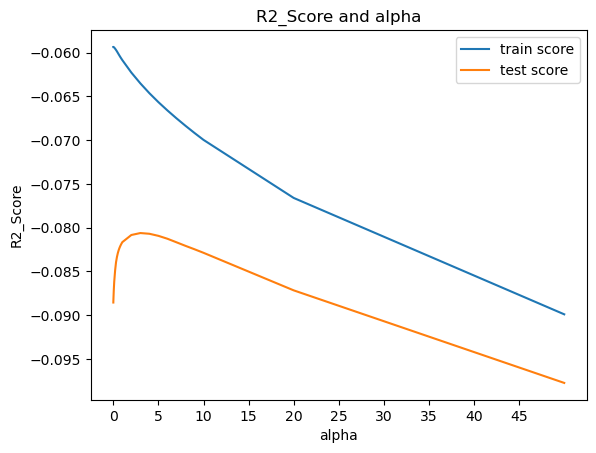

In [49]:
# list of alphas to tune :
# if value too high it will lead to underfitting, 
# if it is too low, it will not handle the overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge(random_state=42)

# cross validation
folds = 10
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

ridge_model_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_model_cv_results = ridge_model_cv_results[ridge_model_cv_results['param_alpha']<=50]

# plotting mean test and train scoes with alpha
plt.plot(ridge_model_cv_results["param_alpha"], ridge_model_cv_results["mean_train_score"])
plt.plot(ridge_model_cv_results["param_alpha"], ridge_model_cv_results["mean_test_score"])
plt.xlabel('alpha')
plt.ylabel('R2_Score')
plt.title("R2_Score and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,50,5))
plt.show()

In [50]:
# Printing the best hyperparameter alpha
print('The optimum alpha is', ridge_model_cv.best_params_['alpha'])


The optimum alpha is 3.0


In [51]:
# Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = ridge_model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha, random_state=42)

ridge.fit(X_train, y_train)
y_test_pred_ridge = ridge.predict(X_test)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred_ridge))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred_ridge))

The R2 Score of the model on the test dataset for optimum alpha is 0.9247537505239164
The MSE of the model on the test dataset for optimum alpha is 0.010618075255161554


In [52]:
# Ridge Co-efficients
Ridge_Coeff = pd.DataFrame(columns=X_train.columns, data=np.atleast_2d(ridge.coef_))
Ridge_Coeff = Ridge_Coeff.T
Ridge_Coeff.columns = ['Ridge_Coeff']
Ridge_Coeff.sort_values(by=['Ridge_Coeff'], ascending=False, inplace=True)
print("The top 30 features selected by Ridge Regression are : ")
Ridge_Coeff.head(30)

The top 30 features selected by Ridge Regression are : 


Ridge_Coeff
OverallQual               0.275794
TotalAreaSF               0.240176
OverallCond               0.230851
GrLivArea                 0.198578
1stFlrSF                  0.179150
BsmtFinSF1                0.135322
TotalBsmtSF               0.120741
Neighborhood_Crawfor      0.120463
MSZoning_FV               0.116619
LotArea                   0.112661
MSZoning_RL               0.109183
MSZoning_RH               0.099670
Functional_Typ            0.094657
2ndFlrSF                  0.093082
Neighborhood_StoneBr      0.091420
MSZoning_RM               0.089799
CentralAir_Y              0.087112
FullBath                  0.086636
Exterior1st_BrkFace       0.080350
GarageArea                0.078695
SaleType_ConLD            0.076672
SaleCondition_Partial     0.068949
HalfBath                  0.068375
Condition1_Norm           0.066499
TotRmsAbvGrd              0.064735
WoodDeckSF                0.060177
GarageCars                0.057101
BsmtExposure_Gd           0.054380
Foundation_PConc          0.052458
SaleCondition_Normal      0.051836

In [53]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

print("Ridge Model : ")

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train_ridge)
print("R2 score (Train) : ", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_ridge)
print("R2 score (Test) : ", r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_ridge))
print("RSS (Train) : ", rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_ridge))
print("RSS (Test) : ",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_ridge)
print("MSE (Train) : ", mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_ridge)
print("MSE (Test) : ", mse_test_lr)
metric2.append(mse_test_lr**0.5)

Ridge Model : 
R2 score (Train) :  0.9369060756416533
R2 score (Test) :  0.9247537505239164
RSS (Train) :  7.889810750322702
RSS (Test) :  4.215375876299137
MSE (Train) :  0.0085203139852297
MSE (Test) :  0.010618075255161554


### Lasso Regression

In [54]:
lasso = Lasso(random_state=42)

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, # Params listed in Ridge section
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, # Folds listed in Ridge section
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Lasso(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
# Printing the best hyperparameter alpha
print("The optimum alpha is", lasso_model_cv.best_params_['alpha'])

The optimum alpha is 0.001


In [56]:
# Fitting lasso model for alpha = 100 and printing coefficients which have been penalised

alpha = lasso_model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha, random_state=42)
        
lasso.fit(X_train, y_train) 

y_test_pred_lasso = lasso.predict(X_test)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred_lasso))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred_lasso))

The R2 Score of the model on the test dataset for optimum alpha is 0.9238597806207166
The MSE of the model on the test dataset for optimum alpha is 0.01074422426290767


In [57]:
# Lasso Co-efficients
Lasso_Coeff = pd.DataFrame(columns=X_train.columns, data=np.atleast_2d(lasso.coef_))
Lasso_Coeff = Lasso_Coeff.T
Lasso_Coeff.columns = ['Lasso_Coeff']
Lasso_Coeff.sort_values(by=['Lasso_Coeff'], ascending=False, inplace=True)
print("The top 30 features selected by Lasso Regression are : ")
Lasso_Coeff.head(20)

The top 30 features selected by Lasso Regression are : 


Lasso_Coeff
TotalAreaSF               0.789795
OverallQual               0.442333
OverallCond               0.270512
LotArea                   0.120258
BsmtFinSF1                0.105805
GarageArea                0.104385
Neighborhood_Crawfor      0.100787
CentralAir_Y              0.088062
SaleCondition_Partial     0.080142
MSZoning_FV               0.061119
Functional_Typ            0.056518
MSZoning_RL               0.054348
Condition1_Norm           0.051063
BsmtExposure_Gd           0.046622
SaleCondition_Normal      0.042682
GarageCars                0.038316
Foundation_PConc          0.038088
PavedDrive_Y              0.037920
WoodDeckSF                0.036442
TotalPorchSF              0.031098

In [58]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

print("Lasso Model : ")

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train_lasso)
print("R2 score (Train) : ", r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lasso)
print("R2 score (Test) : ", r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_lasso))
print("RSS (Train) : ", rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_lasso))
print("RSS (Test) : ", rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lasso)
print("MSE (Train) : ", mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lasso)
print("MSE (Test) : ", mse_test_lr)
metric3.append(mse_test_lr**0.5)

Lasso Model : 
R2 score (Train) :  0.9194066852555629
R2 score (Test) :  0.9238597806207166
RSS (Train) :  10.078086084221864
RSS (Test) :  4.265457032374345
MSE (Train) :  0.010883462293976095
MSE (Test) :  0.01074422426290767


### Model Comparision

In [59]:
# Creating a table which contain all the metrics

lr_table = {
    'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)',
               'RSS (Test)', 'RMSE (Train)','RMSE (Test)'], 
    'LR Coeff': metric
}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'LR Coeff'] )

rg_metric = pd.Series(metric2, name = 'Ridge Coeff')
ls_metric = pd.Series(metric3, name = 'Lasso Coeff')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric      LR Coeff  Ridge Coeff  Lasso Coeff
0  R2 Score (Train)  9.440798e-01     0.936906     0.919407
1   R2 Score (Test) -1.710688e+20     0.924754     0.923860
2       RSS (Train)  6.992745e+00     7.889811    10.078086
3        RSS (Test)  9.583456e+21     4.215376     4.265457
4      RMSE (Train)  8.689971e-02     0.092306     0.104324
5       RMSE (Test)  4.913216e+09     0.103044     0.103654

In [60]:
betas = pd.DataFrame(index=X.columns)

In [61]:
betas.rows = X.columns

In [62]:
betas['Linear Co_eff'] = lm.coef_
betas['Ridge Co_eff'] = ridge.coef_
betas['Lasso Co_eff'] = lasso.coef_

In [63]:
# pd.set_option('display.max_rows', None)
betas

Linear Co_eff  Ridge Co_eff  Lasso Co_eff
LotFrontage                 0.020402      0.032780      0.000000
LotArea                     0.121460      0.112661      0.120258
OverallQual                 0.321741      0.275794      0.442333
OverallCond                 0.304818      0.230851      0.270512
MasVnrArea                  0.053731      0.040595      0.000000
...                              ...           ...           ...
SaleCondition_AdjLand       0.060530      0.015732     -0.000000
SaleCondition_Alloca        0.060837      0.013543     -0.000000
SaleCondition_Family       -0.031483     -0.037170     -0.000000
SaleCondition_Normal        0.050613      0.051836      0.042682
SaleCondition_Partial       0.165684      0.068949      0.080142

[239 rows x 3 columns]

We are able to achieve an R2 score of 0.92 approximatley using both Ridge & Lasso Regression.
The below are the top 15 features which are important in predicting the SalePrice of the property as demonstrated by the Lasso Regression model : 
- TotalAreaSF
- OverallQual
- OverallCond
- LotArea
- BsmtFinSF1
- GarageArea
- Neighborhood_Crawfor
- CentralAir_Y
- SaleCondition_Partial
- MSZoning_FV
- Functional_Typ
- MSZoning_RL
- Condition1_Norm
- BsmtExposure_Gd
- SaleCondition_Normal


In [64]:
cols = ['TotalAreaSF', 'OverallQual', 'OverallCond', 'LotArea', 'BsmtFinSF1', 
        'GarageArea', 'Neighborhood_Crawfor', 'CentralAir_Y', 'SaleCondition_Partial', 
        'MSZoning_FV', 'Functional_Typ', 'MSZoning_RL', 'Condition1_Norm', 'BsmtExposure_Gd', 
        'SaleCondition_Normal']

betas.loc[cols]

Linear Co_eff  Ridge Co_eff  Lasso Co_eff
TotalAreaSF            -9.776131e+11      0.240176      0.789795
OverallQual             3.217406e-01      0.275794      0.442333
OverallCond             3.048183e-01      0.230851      0.270512
LotArea                 1.214600e-01      0.112661      0.120258
BsmtFinSF1              4.881253e+10      0.135322      0.105805
GarageArea              6.773949e-02      0.078695      0.104385
Neighborhood_Crawfor    1.267891e-01      0.120463      0.100787
CentralAir_Y            6.074142e-02      0.087112      0.088062
SaleCondition_Partial   1.656837e-01      0.068949      0.080142
MSZoning_FV             4.512558e-01      0.116619      0.061119
Functional_Typ          1.232834e-01      0.094657      0.056518
MSZoning_RL             3.928719e-01      0.109183      0.054348
Condition1_Norm         8.195496e-02      0.066499      0.051063
BsmtExposure_Gd         4.086113e-02      0.054380      0.046622
SaleCondition_Normal    5.061340e-02      0.051836      0.042682

The above coefficients are w.r.t the log transformed SalePrice. To get the actual coefficients, we will have to apply the inverse log (i.e., exponential function) to the above coefficients, in order to get the linear relationship between the SalePrice & the top 15 features.

# Subjective Questions

Question 1 :

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [65]:
# Building Ridge Model by doubling the value of alpha to 6
ridge_alpha_double = Ridge(alpha=6, random_state=42)
ridge_alpha_double.fit(X_train, y_train)
# ridge_alpha_double_coef = ridge_alpha_double.coef_
y_test_pred_ridge = ridge_alpha_double.predict(X_test)

print('The R2 Score of the model on the test dataset for doubled alpha is', r2_score(y_test, y_test_pred_ridge))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred_ridge))

ridge_alpha_double_coeff = pd.DataFrame(columns=X_train.columns, data = np.atleast_2d(ridge_alpha_double.coef_))
ridge_alpha_double_coeff = ridge_alpha_double_coeff.T
ridge_alpha_double_coeff.columns = ['Ridge Doubled Alpha Co-Efficient']
ridge_alpha_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False, inplace=True)
print('The most important predictor variables are as follows:')
ridge_alpha_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.9246182100331957
The MSE of the model on the test dataset for doubled alpha is 0.010637201512491517
The most important predictor variables are as follows:


Ridge Doubled Alpha Co-Efficient
OverallQual                                   0.233427
TotalAreaSF                                   0.220051
OverallCond                                   0.189286
GrLivArea                                     0.178974
1stFlrSF                                      0.166509
BsmtFinSF1                                    0.122843
TotalBsmtSF                                   0.113155
Neighborhood_Crawfor                          0.111835
LotArea                                       0.108515
CentralAir_Y                                  0.089842
FullBath                                      0.084805
2ndFlrSF                                      0.082179
Functional_Typ                                0.081594
GarageArea                                    0.079505
Neighborhood_StoneBr                          0.079411
MSZoning_RL                                   0.077317
MSZoning_FV                                   0.076998
TotRmsAbvGrd                                  0.074395
Exterior1st_BrkFace                           0.067073
HalfBath                                      0.063237

In [66]:
# Building Lasso Model by doubling the value of alpha to 0.002
lasso_alpha_double = Lasso(alpha=0.002, random_state=42)
lasso_alpha_double.fit(X_train, y_train)
# lasso_alpha_double_coef = lasso_alpha_double.coef_
y_test_pred_lasso = lasso_alpha_double.predict(X_test)

print('The R2 Score of the model on the test dataset for doubled alpha is', r2_score(y_test, y_test_pred_lasso))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred_lasso))

lasso_alpha_double_coeff = pd.DataFrame(columns=X_train.columns, data = np.atleast_2d(lasso_alpha_double.coef_))
lasso_alpha_double_coeff = lasso_alpha_double_coeff.T
lasso_alpha_double_coeff.columns = ['Lasso Doubled Alpha Co-Efficient']
lasso_alpha_double_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False, inplace=True)
print('The most important predictor variables are as follows:')
lasso_alpha_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.9134764217538571
The MSE of the model on the test dataset for doubled alpha is 0.012209430656811796
The most important predictor variables are as follows:


Lasso Doubled Alpha Co-Efficient
TotalAreaSF                                    0.760670
OverallQual                                    0.467099
OverallCond                                    0.185629
GarageArea                                     0.138628
LotArea                                        0.115091
BsmtFinSF1                                     0.102525
CentralAir_Y                                   0.092878
Neighborhood_Crawfor                           0.070669
SaleCondition_Partial                          0.061688
MSZoning_RL                                    0.048050
Functional_Typ                                 0.044637
Foundation_PConc                               0.043577
PavedDrive_Y                                   0.042524
Condition1_Norm                                0.040154
BsmtExposure_Gd                                0.035367
MSZoning_FV                                    0.029000
BsmtFinType1_GLQ                               0.028788
SaleCondition_Normal                           0.026300
GarageCond_TA                                  0.025353
Neighborhood_NridgHt                           0.019875

In [67]:
scores = ['R2 Score Train', 'R2 Score Test', 'RMSE Train', 'RMSE Test']
data = {
    'Ridge_alpha' : [final_metric['Ridge Coeff'][0], 
                     final_metric['Ridge Coeff'][1], 
                     final_metric['Ridge Coeff'][4], 
                     final_metric['Ridge Coeff'][5]],
    'Ridge_alpha_double' : [r2_score(y_train, ridge_alpha_double.predict(X_train)), 
                            r2_score(y_test, y_test_pred_ridge), 
                            mean_squared_error(y_train, ridge_alpha_double.predict(X_train))**0.5,
                            mean_squared_error(y_test, y_test_pred_lasso)**0.5],
    'Lasso_alpha' : [final_metric['Lasso Coeff'][0], 
                     final_metric['Lasso Coeff'][1], 
                     final_metric['Lasso Coeff'][4], 
                     final_metric['Lasso Coeff'][5]],
    'Lasso_alpha_double' : [r2_score(y_train, lasso_alpha_double.predict(X_train)),
                            r2_score(y_test, y_test_pred_lasso), 
                            mean_squared_error(y_train, lasso_alpha_double.predict(X_train))**0.5,
                            mean_squared_error(y_test, y_test_pred_ridge)**0.5]
}



double_alpha_comparision = pd.DataFrame(data, index = scores)
double_alpha_comparision

Ridge_alpha  Ridge_alpha_double  Lasso_alpha  \
R2 Score Train     0.936906            0.931628     0.919407   
R2 Score Test      0.924754            0.924618     0.923860   
RMSE Train         0.092306            0.096089     0.104324   
RMSE Test          0.103044            0.110496     0.103654   

                Lasso_alpha_double  
R2 Score Train            0.905082  
R2 Score Test             0.913476  
RMSE Train                0.113216  
RMSE Test                 0.103137

Question-2

You have determined the optimal value of lambda for ridge and lasso regression during the
assignment. Now, which one will you choose to apply and why?

In [70]:
pd.DataFrame([3, 0.001], index = ['Ridge', 'Lasso'], columns = ['Optimum Alpha'])

Optimum Alpha
Ridge          3.000
Lasso          0.001

In [71]:


scores = ['R2 Score Train', 'R2 Score Test', 'RMSE Train', 'RMSE Test']
data = {
    'Ridge' : [final_metric['Ridge Coeff'][0], 
                     final_metric['Ridge Coeff'][1], 
                     final_metric['Ridge Coeff'][4], 
                     final_metric['Ridge Coeff'][5]],
    'Lasso' : [final_metric['Lasso Coeff'][0], 
                     final_metric['Lasso Coeff'][1], 
                     final_metric['Lasso Coeff'][4], 
                     final_metric['Lasso Coeff'][5]]
}
pd.DataFrame(data, index = scores)

Ridge     Lasso
R2 Score Train  0.936906  0.919407
R2 Score Test   0.924754  0.923860
RMSE Train      0.092306  0.104324
RMSE Test       0.103044  0.103654

Question 3

After building the model, you realised that the five most important predictor variables in the
lasso model are not available in the incoming data. You will now have to create another
model excluding the five most important predictor variables. Which are the five most
important predictor variables now?

In [72]:
# Dropping the top 5 features : ‘TotalAreaSF’, ‘OverallQual’, ‘OverallCond’, ‘LotArea’, ‘BsmtFinSF1’
X_train_new = X_train.drop(['TotalAreaSF', 'OverallQual', 'OverallCond', 'LotArea', 'BsmtFinSF1'], axis=1)
X_test_new = X_test.drop(['TotalAreaSF', 'OverallQual', 'OverallCond', 'LotArea', 'BsmtFinSF1'], axis=1)


In [73]:
lasso_new = Lasso(random_state=42)

# cross validation
model_cv_new = GridSearchCV(estimator = lasso,
                        param_grid = params, # Params listed in Ridge section
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

model_cv_new.fit(X_train_new, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Lasso(alpha=0.001, random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [74]:
print("The optimum alpha is", model_cv_new.best_params_['alpha'])

The optimum alpha is 0.0001


In [75]:
# Fitting the lasso model for alpha = 0.0001

lasso_new = Lasso(alpha=model_cv_new.best_params_['alpha'], random_state=42)
lasso_new.fit(X_train_new, y_train)

Lasso(alpha=0.0001, random_state=42)

In [76]:
y_pred_train_new = lasso_new.predict(X_train_new)
y_pred_test_new = lasso_new.predict(X_test_new)

print('The R2 Score of the new model is', r2_score(y_test, y_pred_test_new))
print('The MSE of the new model is', mean_squared_error(y_test, y_pred_test_new))

new_data = {
    'Lasso' : [final_metric['Lasso Coeff'][0],
               final_metric['Lasso Coeff'][1]],
    'Lasso_new' : [r2_score(y_train, y_pred_train_new), 
                   r2_score(y_test, y_pred_test_new)]
}

new_model_comparision = pd.DataFrame(new_data, index=['R2 Train', 'R2 Test'])
new_model_comparision

The R2 Score of the new model is 0.9085525734256691
The MSE of the new model is 0.012904239932459738


Lasso  Lasso_new
R2 Train  0.919407   0.931434
R2 Test   0.923860   0.908553

In [77]:
lasso_new_coeff = pd.DataFrame(columns=X_train_new.columns, data = np.atleast_2d(lasso_new.coef_))
lasso_new_coeff = lasso_new_coeff.T
lasso_new_coeff.columns = ['Lasso New Co-Efficients']
lasso_new_coeff.sort_values(by=['Lasso New Co-Efficients'], ascending=False, inplace=True)
print('The most important predictor variables are as follows:')
lasso_new_coeff.head(20)

The most important predictor variables are as follows:


Lasso New Co-Efficients
GrLivArea                             0.796977
TotalBsmtSF                           0.524682
MSZoning_FV                           0.389781
MSZoning_RL                           0.373982
MSZoning_RH                           0.369887
MSZoning_RM                           0.343758
Neighborhood_Crawfor                  0.148843
Foundation_Stone                      0.144136
Functional_Typ                        0.137142
SaleType_ConLD                        0.113750
Exterior1st_BrkFace                   0.106897
Neighborhood_StoneBr                  0.105058
CentralAir_Y                          0.103013
GarageArea                            0.100388
SaleType_CWD                          0.079960
SaleCondition_Partial                 0.075841
Condition1_Norm                       0.070932
WoodDeckSF                            0.065039
Neighborhood_Veenker                  0.062734
Functional_Min1                       0.061619